# Topic Modeling
This file apply topic modeling to different datasets. By labeling the corpus with topics, we can show the topic distribution in different groups, and use the catagorical topic features to predict specific targets (e.g. group affiliation, volume burst, etc)

# Preparation

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-rwuvz4lj
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-rwuvz4lj
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

# import the data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/data_aca.csv')
df

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name,...,Pub_Year,Pub_Month,Pub_Day,normalized_text,tokenized_sentences,TopPost,Length,Aca,active_author,active_reply_author
0,精华\n\n\n \n ...,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1115,2023-12-21,2020-10-09,2,4,4,Academia,...,2020,10,9,"['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack'...","[['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack...",True,313,1.0,1,1
1,精华\n\n\n \n ...,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,64,2023-12-01,2020-10-14,1,2,1,Academia,...,2020,10,14,"['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '问...","[['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '...",True,67,1.0,1,1
2,精华\n\n\n \n ...,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,12,2023-07-04,2020-10-10,4,6,4,Academia,...,2020,10,10,"['前', '情', '意见', '征集', '贴', 'https', 'www', 'd...","[['前', '情', '意见', '征集', '贴', 'https', 'www'], ...",True,244,1.0,1,1
3,精华\n\n\n \n ...,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2023-05-03,2020-11-02,1,6,0,Academia,...,2020,11,2,"['论坛', '第二期', '分享', '会', '说', 'PhD', '人生', '路径...","[['论坛', '第二期', '分享', '会', '说', 'phd', '人生', '路...",True,177,1.0,1,0
4,精华\n\n\n \n ...,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,6,2023-03-25,2020-12-09,2,2,1,Academia,...,2020,12,9,"['09', '30', '21', '更新', '管理员', '实在', '能力', '追...","[['更新', '管理员', '实在', '能力', '追踪', '申请', '相关', '...",True,478,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,分享一个本领域senior的采访内容,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,1,2020-09-19,2020-09-19,6,2,2,Academia,...,2020,9,19,"['这位', '前辈', '人', '好', '成果', '很多', '采访', '内容',...","[['这位', '前辈', '人', '好', '成果', '很多', '采访', '内容'...",False,69,1.0,0,0
5250,精华\n\n\n \n ...,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,0,2020-09-19,2020-09-19,3,2,2,Academia,...,2020,9,19,"['组', '人才济济', '更好', '整合', '利用', '资源', 'AMA', '...",[],True,72,1.0,1,1
5251,AMA｜美国文理学院做教职（理科）,如题，关于美国文理学院（理科）教职申请、工作日常、工作环境、晋升要求、职业发展，欢迎提问！先...,多喜子,4,2020-09-19,2020-09-18,5,7,1,Academia,...,2020,9,18,"['题', '美国', '文理学院', '理科', '教职', '申请', '工作', '日...","[['题', '美国', '文理学院', '理科', '教职', '申请', '工作', '...",False,79,1.0,0,0
5252,精华\n\n\n \n ...,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,0,2020-09-19,2020-09-19,3,2,2,Academia,...,2020,9,19,"['组', '人才济济', '更好', '整合', '利用', '资源', 'AMA', '...",[],True,72,1.0,1,1


In [4]:
df['normalized_text']

,normalized_text
0,"['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack'..."
1,"['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '问..."
2,"['前', '情', '意见', '征集', '贴', 'https', 'www', 'd..."
3,"['论坛', '第二期', '分享', '会', '说', 'PhD', '人生', '路径..."
4,"['09', '30', '21', '更新', '管理员', '实在', '能力', '追..."
...,...
5249,"['这位', '前辈', '人', '好', '成果', '很多', '采访', '内容',..."
5250,"['组', '人才济济', '更好', '整合', '利用', '资源', 'AMA', '..."
5251,"['题', '美国', '文理学院', '理科', '教职', '申请', '工作', '日..."
5252,"['组', '人才济济', '更好', '整合', '利用', '资源', 'AMA', '..."


In [ ]:
# # Based on several attempts of conducting topic modeling, we need to add some stop words of the normalized text
# stop_words = ["→", "#"]
# # Load the stopwords from the text file and add them to the stop_words list
# file_path = "/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/chinese_stopwords.txt"

# # Open the file in append mode and write each stop word to a new line
# with open(file_path, "a", encoding="utf-8") as file:
#     for word in stop_words:
#         file.write(word + "\n")

# print("Stop words have been added to the file.")

Stop words have been added to the file.


In [5]:
# Based on several attempts of conducting topic modeling, we need to add some stop words of the normalized text
stop_words = ["."]
# Load the stopwords from the text file and add them to the stop_words list
file_path = "/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/chinese_stopwords.txt"

# Read the stopwords from the text file
with open(file_path, "r", encoding="utf-8") as file:
    additional_stopwords = file.read().splitlines()

# Combine the original stop_words with the newly loaded stopwords
stop_words = list(set(stop_words + additional_stopwords))

In [6]:
def elim_stop(l, stopwords):
  new_l = []
  for word in l:
    if word not in stop_words:
      new_l.append(word)
  return new_l

In [7]:
df['normalized_text'] = df['normalized_text'].apply(lambda x: eval(x))
df['normalized_text'] = df['normalized_text'].apply(lambda x: elim_stop(x, stop_words))
df['normalized_text'][:3]

,normalized_text
0,"[猴面包树, 组员, 倡议, 小组, 建立, 官方, slack, 交流, 群, 营造, 友..."
1,"[本帖, 问卷调查, 招募, 研究, 对象, 贴, 姐妹, 问卷调查, 帮忙, 填写, 招募..."
2,"[前, 情, 意见, 征集, 贴, douban, group, topic, 195568..."


In [8]:
# create a copora
dictionary_df = gensim.corpora.Dictionary(df['normalized_text'])
# gensim.corpora.Dictionary is a class in Gensim that is used to map each unique word to a unique id.

In [9]:
corpus = [dictionary_df.doc2bow(text) for text in df['normalized_text']]
# This line converts the list of words in each document into a bag-of-words (BoW) format using the doc2bow method. doc2bow counts the number of occurrences of each unique word in the document and represents the document as a list of (word_id, word_count) tuples.
# The result is a corpus, which is a list of such BoW representations for all documents in the DataFrame.

In [10]:
# serialize the corpus as a file and load it
gensim.corpora.MmCorpus.serialize('df.mm', corpus)
df_mm = gensim.corpora.MmCorpus('df.mm')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


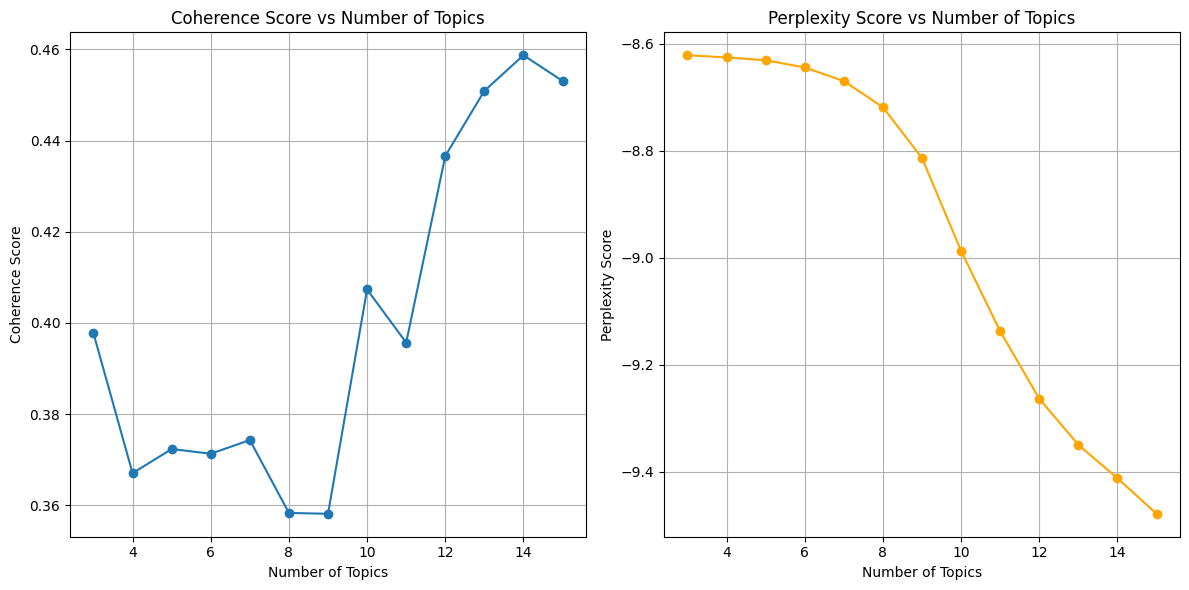

Best Coherence: 0.45869107468531706 at 14 topics
Best Perplexity: -9.47834313225259 at 15 topics


In [65]:
# Initialize lists to store results
coherence_scores = []
perplexity_scores = []

# Loop over the range of topics
for num_topics in range(3, 16):
    # Train the LDA model with the current number of topics
    lda_model = gensim.models.ldamodel.LdaModel(
        corpus=df_mm,
        id2word=dictionary_df,
        num_topics=num_topics,
        alpha='symmetric',  # Common options: 'symmetric' or 'asymmetric'
        eta='symmetric',
        random_state=42,
        passes=10,
        iterations=100
    )

    # Calculate coherence score
    # Import the CoherenceModel class from gensim.models.coherencemodel
    from gensim.models.coherencemodel import CoherenceModel

    coherence_model = CoherenceModel(
        model=lda_model,
        texts=df['normalized_text'],
        dictionary=dictionary_df,
        coherence='c_v'
    )
    coherence_scores.append(coherence_model.get_coherence())

    # Calculate perplexity score
    perplexity_scores.append(lda_model.log_perplexity(df_mm))

# Visualize coherence and perplexity scores
plt.figure(figsize=(12, 6))

# Coherence Score Plot
plt.subplot(1, 2, 1)
plt.plot(range(3, 16), coherence_scores, marker='o', label='Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid()

# Perplexity Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(3, 16), perplexity_scores, marker='o', label='Perplexity Score', color='orange')
plt.title('Perplexity Score vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.grid()

plt.tight_layout()
plt.show()

# Determine models with the best coherence scores
best_coherence_idx = max(range(len(coherence_scores)), key=lambda i: coherence_scores[i])
best_coherence_topics = range(3, 16)[best_coherence_idx]

# Determine models with the lowest perplexity scores
best_perplexity_idx = min(range(len(perplexity_scores)), key=lambda i: perplexity_scores[i])
best_perplexity_topics = range(3, 16)[best_perplexity_idx]

print(f"Best Coherence: {coherence_scores[best_coherence_idx]} at {best_coherence_topics} topics")
print(f"Best Perplexity: {perplexity_scores[best_perplexity_idx]} at {best_perplexity_topics} topics")

The above result shows that 14 could be the best topic number.

In [48]:
# Apply the LDA model
dflda = gensim.models.ldamodel.LdaModel(
        corpus=df_mm,
        id2word=dictionary_df,
        num_topics=14,
        alpha='symmetric',  # Common options: 'symmetric' or 'asymmetric'
        eta='symmetric',
        random_state=42,
        passes=10,
        iterations=100)
# This line creates an LDA model using the LdaModel class. The LDA (Latent Dirichlet Allocation) model is a type of topic model that discovers abstract "topics" that occur in a collection of documents.
# corpus=df_mm specifies the corpus to model.
# id2word=dictionary_df provides the mapping from word ids to words.
# num_topics=10 sets the number of topics to be extracted from the corpus.
# alpha='auto' and eta='auto' allow the model to automatically learn the hyperparameters for the document-topic (alpha) and topic-word (eta) distributions, respectively.
# The result is wialda, an LDA model trained on the corpus, capable of inferring topics from the collection of documents.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
dfldaDF = pd.DataFrame({
        'title' : df['Title'],
        'topics' : [dflda[dictionary_df.doc2bow(l)] for l in df['normalized_text']]
    })

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
#Dict to temporally hold the probabilities
wiatopicsProbDict = {i : [0] * len(dfldaDF) for i in range(dflda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(dfldaDF['topics']):
    for topicNum, prob in topicTuples:
        wiatopicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(dflda.num_topics):
    dfldaDF['topic_{}'.format(topicNum)] = wiatopicsProbDict[topicNum]

dfldaDF[1::300]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13
1,精华\n\n\n \n ...,"[(2, 0.15828341), (11, 0.098337635), (12, 0.58...",0.000000,0.000000,0.158283,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.098338,0.582167,0.138664
301,想去加拿大读博，提前一年进该组做科研助理是否可行？,"[(0, 0.30723658), (5, 0.6762702)]",0.307237,0.000000,0.000000,0.000000,0.000000,0.676270,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
601,性别主义研究,"[(0, 0.4372647), (2, 0.18455362), (4, 0.277813...",0.437265,0.000000,0.184554,0.000000,0.277814,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.069285,0.000000
901,该怎么回复导师呢,"[(0, 0.15378113), (3, 0.23093656), (5, 0.42100...",0.153781,0.000000,0.000000,0.230937,0.000000,0.421008,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164442
1201,HKSYU 社会学系招聘研究助理：文化遗产/数字遗产/虚拟博物馆/...,"[(0, 0.22999711), (2, 0.6889637), (8, 0.059755...",0.229997,0.000000,0.688964,0.000000,0.000000,0.000000,0.0,0.000000,0.059756,0.000000,0.000000,0.000000,0.000000,0.000000
1501,北欧排名300多大学的岗位制博士可以去吗？,"[(0, 0.61507404), (4, 0.04909484), (5, 0.18302...",0.615074,0.000000,0.000000,0.000000,0.049095,0.183024,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137848
1801,phd申请要求看MA的论文 超级慌怎么破,"[(0, 0.46675164), (8, 0.5123042)]",0.466752,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.512304,0.000000,0.000000,0.000000,0.000000,0.000000
2101,未来想run呜呜呜 硕士专业选择求助sos,"[(0, 0.6977127), (12, 0.04052684), (13, 0.2576...",0.697713,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040527,0.257640
2401,关于和教授coauthor,"[(3, 0.28617257), (4, 0.0313881), (5, 0.535753...",0.000000,0.000000,0.000000,0.286173,0.031388,0.535754,0.0,0.000000,0.000000,0.000000,0.000000,0.055228,0.078326,0.000000
2701,PhD入学前焦虑,"[(0, 0.6034237), (3, 0.06393603), (10, 0.01609...",0.603424,0.000000,0.000000,0.063936,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.016096,0.068356,0.035487,0.204145


In [51]:
# Visualization
dfldaDFV = dfldaDF[:14][['topic_%d' %x for x in range(14)]]
dfldaDFVisN = dfldaDF.index[:14]
dfldaDFVis = dfldaDFV.values
dfldaDFVisNames = dfldaDFVisN.values
dfldaDFV

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.130751,0.300917,0.000000,0.563755,0.000000
1,0.000000,0.000000,0.158283,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.098338,0.582167,0.138664
2,0.077901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.562498,0.000000,0.075969,0.277505,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.185561,0.000000,0.000000,0.801029,0.000000
4,0.081193,0.000000,0.000000,0.000000,0.000000,0.054179,0.0,0.00000,0.156518,0.000000,0.000000,0.000000,0.704859,0.000000
5,0.000000,0.156658,0.000000,0.127924,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.262623,0.426299,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.964089,0.032876,0.000000
7,0.074066,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.300032,0.000000,0.000000,0.323478,0.297972,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.244068,0.000000,0.246828,0.268865,0.238611
9,0.236431,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.147723,0.104858,0.000000,0.000000,0.499816,0.000000


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


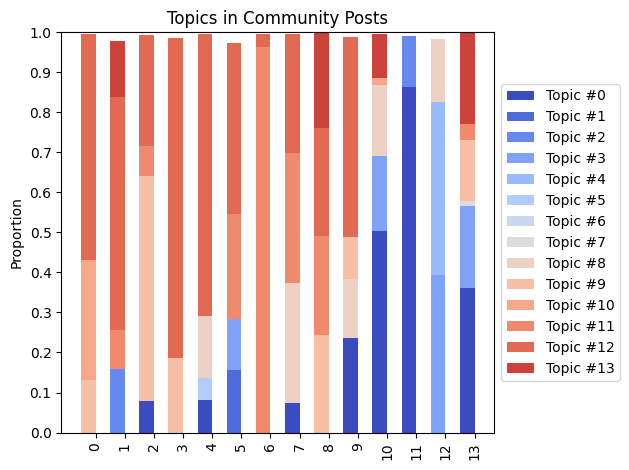

In [52]:


# Stacked bar chart
N = dfldaDFVis.shape[0]  # Number of documents (or posts)
ind = np.arange(N)  # x-axis locations for the posts
K = dflda.num_topics  # Number of topics
width = 0.5  # Width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k / K, 1)  # Generate color based on the topic number
    if k == 0:
        p = plt.bar(ind, dfldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, dfldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += dfldaDFVis[:, k]
    plots.append(p)

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Proportion')
plt.title('Topics in Community Posts')

# Ensure correct alignment between ticks and labels
plt.xticks(ind + width / 2, dfldaDFVisNames[:N], rotation='vertical')

plt.yticks(np.linspace(0, 1, 11))  # Set yticks for better readability
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True, bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


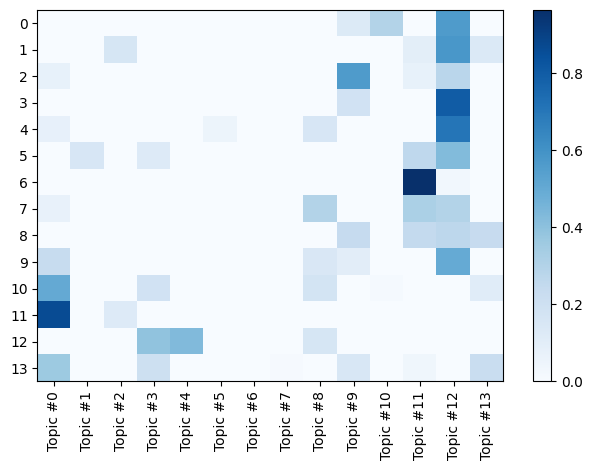

In [53]:
# heat map

plt.pcolor(dfldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(dfldaDFVis.shape[0])+0.5, dfldaDFVisNames);
plt.xticks(np.arange(dfldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [54]:
# top words
dflda.show_topic(2)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('研究', 0.03040421),
 ('人类学', 0.011536555),
 ('中国', 0.008815598),
 ('社会学', 0.008715317),
 ('相关', 0.00786263),
 ('访谈', 0.006820379),
 ('健康', 0.006770413),
 ('专业', 0.0062713525),
 ('传播学', 0.006255803),
 ('乡村', 0.0061811507)]

In [55]:
topicsDict = {}
for topicNum in range(dflda.num_topics):
    topicWords = [w for w, p in dflda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13
0,申请,😭,研究,导师,雅思,导师,XX,读博,面试,女性,😭,论文,姐妹,真的
1,专业,🥺,人类学,老师,托福,教授,题,结婚,研究,学术,投票,研究,分享,工作
2,学校,DDL,中国,论文,学校,老师,天文,压榨,申请,分享,电脑,文献,️,事情
3,方向,志愿者,社会学,方向,考,学校,berkeley,教书,老师,研究,真的,很多,小组,时间
4,工作,走神,相关,文章,语言,回复,解决,marker,项目,活动,队友,方法,PhD,很多
5,博士,姐妹,访谈,学生,成绩,申请,贡献,家乡,邮件,信息,😢,内容,申请,学习
6,硕士,救救,健康,研究,申请,邮件,试验,ㄒ,岗位,领域,app,写作,希望,喜欢
7,项目,孩子,专业,博士,价格,推荐信,人体工学,函数,经历,性别,查看,数据,朋友,老板
8,本科,私,传播学,一篇,钱,收到,🆘,生活,时间,时间,单选,发现,research,实验
9,读,小组,乡村,学术,听力,phd,模板,matlab,收到,姐妹,内诺,文章,交流,焦虑


In [22]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.9 MB/s eta 0:00:00


In [56]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Create pyLDAvis visualization
lda_vis = gensimvis.prepare(dflda, df_mm, dictionary_df)

# Display the visualization
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
import numpy as np

num_topics = dflda.num_topics  # Ensure the number of topics is correctly defined

# Function to get topic distribution as a fixed-length vector
def get_topic_vector(doc, lda_model, dictionary, num_topics):
    topic_distribution = lda_model[dictionary.doc2bow(doc)]
    topic_vector = np.zeros(num_topics)  # Initialize with zeros
    for topic_id, prob in topic_distribution:
        topic_vector[topic_id] = prob  # Assign probabilities to the correct topic index
    return topic_vector

# Convert documents into topic vectors
doc_topic_matrix_before = np.array([get_topic_vector(doc, dflda, dictionary_df, num_topics)
                                    for doc in df_before['normalized_text']])

doc_topic_matrix_after = np.array([get_topic_vector(doc, dflda, dictionary_df, num_topics)
                                   for doc in df_after['normalized_text']])

# Check dimensions
print("Shape of doc_topic_matrix_before:", doc_topic_matrix_before.shape)
print("Shape of doc_topic_matrix_after:", doc_topic_matrix_after.shape)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of doc_topic_matrix_before: (3716, 14)
Shape of doc_topic_matrix_after: (1538, 14)


Step 1: Entropy Analysis (Measure Diversity)

This calculates the entropy for each document and compares the overall diversity before and after July 2022.

In [61]:
import numpy as np
from scipy.stats import entropy

# Compute entropy for each document and take the average
entropy_before = np.mean([entropy(doc) for doc in doc_topic_matrix_before if np.sum(doc) > 0])
entropy_after = np.mean([entropy(doc) for doc in doc_topic_matrix_after if np.sum(doc) > 0])

print(f"Entropy Before July 2022: {entropy_before:.4f}")
print(f"Entropy After July 2022: {entropy_after:.4f}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entropy Before July 2022: 0.9872
Entropy After July 2022: 0.8835


Step 2: Topic Shift Analysis (Compare Topic Distributions Over Time)

This calculates the average topic distribution before and after July 2022 and stores them in a DataFrame for easy comparison.

In [62]:
import pandas as pd

# Compute average topic proportions
topic_distribution_before = np.mean(doc_topic_matrix_before, axis=0)
topic_distribution_after = np.mean(doc_topic_matrix_after, axis=0)

# Create a DataFrame for comparison
df_topic_shift = pd.DataFrame({
    "Topic": [f"Topic {i}" for i in range(len(topic_distribution_before))],
    "Before July 2022": topic_distribution_before,
    "After July 2022": topic_distribution_after
})

# Display the DataFrame
print(df_topic_shift)


       Topic  Before July 2022  After July 2022
0    Topic 0          0.318585         0.352890
1    Topic 1          0.011601         0.018409
2    Topic 2          0.018311         0.027846
3    Topic 3          0.086524         0.091351
4    Topic 4          0.014602         0.024580
5    Topic 5          0.090355         0.096025
6    Topic 6          0.007593         0.012991
7    Topic 7          0.010261         0.017448
8    Topic 8          0.043100         0.042709
9    Topic 9          0.052520         0.048281
10  Topic 10          0.013676         0.014824
11  Topic 11          0.135625         0.085342
12  Topic 12          0.071460         0.062575
13  Topic 13          0.103894         0.085097


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


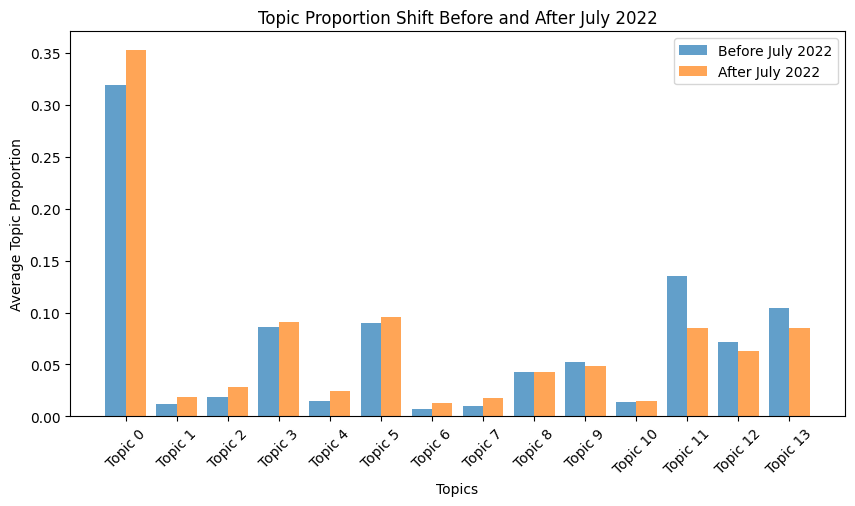

In [63]:
import matplotlib.pyplot as plt

# Bar Chart for Topic Proportion Changes
plt.figure(figsize=(10, 5))
bar_width = 0.4
indices = np.arange(len(topic_distribution_before))

plt.bar(indices, topic_distribution_before, width=bar_width, label='Before July 2022', alpha=0.7)
plt.bar(indices + bar_width, topic_distribution_after, width=bar_width, label='After July 2022', alpha=0.7)

plt.xlabel("Topics")
plt.ylabel("Average Topic Proportion")
plt.xticks(indices + bar_width / 2, [f"Topic {i}" for i in range(len(topic_distribution_before))], rotation=45)
plt.legend()
plt.title("Topic Proportion Shift Before and After July 2022")
plt.show()


In [66]:
# Save the trained LDA model
dflda.save("/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/lda_model")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the LDA model
dflda = LdaModel.load("/path/to/save/lda_model")